## Results with 1% error rate
| Amount of wrong answers | where | result /100 | result/134|
| --- | --- | --- |--- |
| 4/20 | 1-4 | 5/100, with random branching (40): 16/100 |8/134|
| 4/20 | 17-20 | 80/100 | 108/134|
| 4/20 | randomly | 43/100 ||
| 3/20 | 1-3 | 24/100 ||
| 3/20 | 18-20 | 94/100 | 123/134||
| --- | --- | --- ||
| 5% Wrong Answer Rate| any | 106/130 ||

## Experiments
| N Wrong Answers| Wrong Questions |Number Of Itterations|
|--- | --- |---|
|N = 1 |X = {1}, {2}, {3}...{20} | 20|
|N = 2 |X = {1,2}, {2,3}, {3,4}...{19,20}|19|
|N = 3 |X = {1,2,3}, {2,3,4}...{18,19,20}|18|
|N = 4 |X = {1,2,3,4}...{17,18,19,20}|17|
|N = 5 |X = {1,2,3,4,5}...{16,17,18,19,20}|16|
|N = 6 |X = {1,2,3,4,5,6}...{15,16,17,18,19,20}|15|
 


# Curious Results
| Amount of wrong answers | where | result /100 | error rate|
| --- | --- | --- |--- |
| 4/20 | 1-4 | 34/134, if we match error rate|20%|
| 4/20 | 17-20 | 111/134, if we match error rate|20%|
| 4/20 | random | 61/134|10%|
|3/20|1-3|70/134|20% ER
|3/20|1-3|49/134|10% ER
|3/20|18-20|122/134|20% ER
|3/20|18-20|121/134|10% ER
|3/20|random|105/134|20% ER

In [12]:
import numpy as np
scale = 100/134
#RandomPatternBot

avgProbRandOneToSix=[0.011343306068527579, 0.01717684480680996, 0.026337973074462145, 0.04036675984316456, 0.06096209762877133, 0.09372293176013487, 0.14295777190698286, 0.19469876677429768, 0.2329596938003856, 0.26991260552793056, 0.3084810542317585, 0.3426327378700938, 0.3757120205975504, 0.40247508572942176, 0.4282728058028918, 0.45197184748808517, 0.4763540493111003, 0.49676584032269555, 0.5148369227615959, 0.5308484776187231]

avgProbChunks=[]


#Chunks Yes
avgProbN1 = [0.012792107260308926, 0.021971544135450098, 0.03765237323543848, 0.06409128906577106, 0.10803166964119432, 0.18708259142344574, 0.32083471166834626, 0.46554434010489176, 0.568161047386309, 0.6483874324954035, 0.7315441669776469, 0.8044534974679657, 0.8566012659259387, 0.891336127589352, 0.9146912857309283, 0.9301507434112195, 0.9403992164685209, 0.9480239089776299, 0.9543832078108744, 0.9589224795669546]
avgProbN2 = [0.012760941057425106, 0.021735190542396688, 0.0369271014219636, 0.062235649099325496, 0.10369705475638925, 0.1775247675296821, 0.3007712633361223, 0.42416889872173524, 0.4878713334942178, 0.500711419504568, 0.5140623588677999, 0.5511859915197519, 0.6067108149966232, 0.6672005552087089, 0.7242362182102327, 0.7747261647688669, 0.8150364894732347, 0.8458667986628444, 0.8698438712862895, 0.8893713247115201]
avgProbN3 = [0.012726311943109683, 0.02160313332151264, 0.03653971562063193, 0.061273087496757216, 0.10150655910938809, 0.17257758982264845, 0.2900407695076081, 0.40474482403786144, 0.4590615374194385, 0.45914539137081556, 0.4467525994626919, 0.4346167759479369, 0.440968907606186, 0.4709604981949339, 0.518400797226572, 0.5706555403172876, 0.6212245796365087, 0.6684228029028368, 0.7102587685619247, 0.7451217187858595]
avgProbN4 = [0.012687608815345367, 0.021455539956995173, 0.036133211607007616, 0.06028574111928124, 0.09928826050145938, 0.1676182106502873, 0.2793764207112457, 0.386220055687872, 0.4339514099661523, 0.4292927441296532, 0.41061514635315, 0.3868701329444924, 0.3665800734829879, 0.35349760246668244, 0.3617713256771754, 0.39525513738940743, 0.4411868557672838, 0.4911544025294576, 0.5392542132271891, 0.5856704212464992]
avgProbN5 = [0.012644067796610514, 0.021289497421913023, 0.03567589459168027, 0.05918152927800498, 0.09681501144171173, 0.16210257746844142, 0.2675473178278404, 0.3658267917011487, 0.40672420706611667, 0.3981059041181801, 0.37629006054159386, 0.34864991660592703, 0.32121800345744916, 0.291902417256518, 0.265493898948286, 0.25136335115399366, 0.26189297813601076, 0.29782271068489047, 0.3498994718549084, 0.4067633135091508]
avgProbN6 = [0.012594721308711011, 0.021101315882153252, 0.03515760197430927, 0.057930089191225304, 0.0940135822114433, 0.15585846495628472, 0.25415991234387575, 0.34277461485391914, 0.3760311953210854, 0.36317493825118113, 0.33836646734334636, 0.3078579688293967, 0.27735110006596325, 0.24400187152526898, 0.20935276647015555, 0.17578547173277378, 0.14781353652806611, 0.1380249649920791, 0.16344383805537732, 0.21700122384008777]
"""avgProbN1=[0.9397387129273143, 0.9105726425938202, 0.947636433973865, 0.9357511685088921, 0.9682697297890281, 0.9671975587113042, 0.9520174247942395, 0.9431950290463436, 0.9272846220754197, 0.9537190762006056, 0.9703089898091867, 0.9734258302836895, 0.9669466605929736, 0.9702229210253278, 0.9669456608106212, 0.9749271386598813, 0.9778545015414537, 0.9787048408859449, 0.9776138823318034, 0.9761167667773853]
avgProbN2=[0.7631428471751107, 0.7600586130925477, 0.7802516397445408, 0.7805831617758866, 0.9052688828550396, 0.8711807596577218, 0.8676855726217466, 0.8526017561209995, 0.8289531653962063, 0.8869088820951203, 0.9383788373613192, 0.9516342200954698, 0.9498971825049747, 0.9517194306809722, 0.9520258383965077, 0.9676895068747086, 0.9679580267525703, 0.9665028358536891, 0.9556140104637586]
avgProbN3=[0.34112112356057805, 0.4253907198444242, 0.40270278575409263, 0.5553744244104679, 0.6903866937084913, 0.7423204196954568, 0.7504861389220997, 0.7330724090001756, 0.7007203953764629, 0.7568173797408452, 0.8676231722666823, 0.9065473184137834, 0.9078259503441687, 0.9181693729394589, 0.9303724606908421, 0.9442243332001035, 0.9359514447088214, 0.9030843955685316]
avgProbN4=[0.11962218150345703, 0.16419161754161068, 0.19950708490259633, 0.33077789427614496, 0.4791435755608314, 0.6213175859010138, 0.6298659254127411, 0.5726715940053234, 0.5159793370354783, 0.5586898660044283, 0.7168753294049013, 0.8057237323634726, 0.8215774270130708, 0.8644569973761981, 0.8723545254055737, 0.857271054551824, 0.8263714329318296]
avgProbN5=[0.02694248792660429, 0.08130571814858122, 0.08446624685653044, 0.1654649511441188, 0.3072839100429513, 0.4143598703333525, 0.4022113438363676, 0.34967995288634, 0.3184111463118243, 0.34316895084356114, 0.4865232554894982, 0.6232595517884493, 0.7119235786656916, 0.7426252342519778, 0.7418687708926432, 0.7087180467279264]
avgProbN6=[0.009572685376972125, 0.023361242679466095, 0.03374303006011151, 0.08981349172383887, 0.12839575074998635, 0.18554087386418427, 0.19350774343527202, 0.14171464775072112, 0.13580149431023814, 0.154808292860416, 0.2830966119323378, 0.39001345472926846, 0.4950778354799857, 0.48066280062842653, 0.5099084020200886]
"""
for i in range(len(avgProbN1)):
    avgProbChunks.append((avgProbN1[i]+avgProbN2[i]+avgProbN3[i]+avgProbN4[i]+avgProbN5[i]+avgProbN6[i]) / 6)
    

resultsSixWrongRandomly = [3 ,4 ,5 ,8 ,5 ,3 ,4 ,8 ,1 ,2 ] # sum 43
resultsFiveWrongRandomly =[30 ,29 ,24 ,29 ,33 ,27 ,22 ,17 ,24 ,22]
resultsFourWrongRandomly = [69,63,58,66,60,64,66,65,57,52] #sum 620
resultsThreeWrongRandomly = [101 ,98 ,97 ,101 ,110,110, 94 ,96 ,97 ,106] #sum 1010
resultsTwoWrongRandomly = [126 ,124 ,125 ,121 ,125 , 130 ,124 ,124 ,122 ,119] # sum 1240
resultsOneWrongRandomly = [131 ,127 ,130 ,133 ,130 ,134 ,133 ,134 ,131 ,129] #sum 1312
resultsZeroWrong=[134,134,134,134,134,134,134,134,134,134] # sum 1340



resultsSixWrongRandomly = np.multiply(resultsSixWrongRandomly, scale)
resultsFiveWrongRandomly = np.multiply(resultsFiveWrongRandomly, scale)
resultsFourWrongRandomly = np.multiply(resultsFourWrongRandomly, scale)
resultsThreeWrongRandomly = np.multiply(resultsThreeWrongRandomly, scale)
resultsTwoWrongRandomly = np.multiply(resultsTwoWrongRandomly, scale)
resultsOneWrongRandomly = np.multiply(resultsOneWrongRandomly, scale)
resultsZeroWrong = np.multiply(resultsZeroWrong, scale)

resWrongRandom=[resultsOneWrongRandomly, resultsTwoWrongRandomly, resultsThreeWrongRandomly, resultsFourWrongRandomly, resultsFiveWrongRandomly,resultsSixWrongRandomly]
PerformanceNWrongsRandom=[sum(resultsOneWrongRandomly)/10, sum(resultsTwoWrongRandomly)/10, sum(resultsThreeWrongRandomly)/10, sum(resultsFourWrongRandomly)/10, sum(resultsFiveWrongRandomly)/10, sum(resultsSixWrongRandomly)/10]
#CHUNKBOT

resultOneWrongCo=[130,124,131,129,133,134,133,130,132,132,134,133,131,133,131,134,134,134,134,134]
resultTwoWrongCo=[110, 108, 111,107,127,124,120,118,120,127,131,130,130,130,130,133,132,133,130]
resultThreeWrongCo= [62, 62, 62, 85, 100, 112, 109, 107, 111, 116, 124, 127, 123, 126, 127, 130, 129, 123] #last two not real
resultFourWrongCo=[17, 33, 36, 51, 73, 93, 88, 86, 80, 91, 112, 115, 114, 121, 120, 118, 110]
resultFiveWrongCo=[4, 16, 17, 27, 47, 64, 61, 50, 59, 64, 81, 93, 103, 103, 101, 95]
resultSixWrongCo=[0, 1, 5, 17, 15, 26, 26, 24, 26, 27, 42, 58, 75, 68, 69]


OnePlusZero=[130, 124, 131, 129, 133, 134, 133, 130, 132, 132, 134, 133, 131, 133, 131, 134, 134, 134, 134, 134]
OnePlusOne=[117,113,117,122,120,125,121,123,123,127,124,126,126,130,128,128,130,128, 129, 130] #missing 2 datapoints?
OnePlusTwo=[88,92,93,80,104,99,109,104,105,105,106,100,104,105,110,109,112,112,109,114]             
OnePlusThree=[43 ,51 ,49 ,57 ,52 ,51 ,62 ,64 ,61,67 ,67 ,67 ,64 ,57 ,73 ,57 ,70 ,72 ,74 ,80]
OnePlusFour=[14 , 21 ,15 ,15 ,17 ,24 ,22 ,30 ,23 ,24 ,20 ,27 ,27 ,30 ,34 ,35 ,26 ,33 ,31 ,34]
OnePlusFive=[1 ,2 ,4 ,5 ,2 ,3 ,4 ,6 ,5 ,4 ,7 ,5 ,8 ,5 ,10 ,5 ,2 ,6 ,4 ,9 ]

resultOneWrongCo= np.multiply(resultOneWrongCo, scale)
resultTwoWrongCo= np.multiply(resultTwoWrongCo, scale)
resultThreeWrongCo=  np.multiply(resultThreeWrongCo, scale)
resultFourWrongCo= np.multiply(resultFourWrongCo, scale)
resultFiveWrongCo= np.multiply(resultFiveWrongCo, scale)
resultSixWrongCo= np.multiply(resultSixWrongCo, scale)

resWrongChunk=[resultOneWrongCo,resultTwoWrongCo,resultThreeWrongCo,resultFourWrongCo,resultFiveWrongCo,resultSixWrongCo]

avgOverAll=[sum(resultOneWrongCo)/20, sum(resultTwoWrongCo)/19,sum(resultThreeWrongCo)/18,sum(resultFourWrongCo)/17,sum(resultFiveWrongCo)/16, sum(resultSixWrongCo)/15]

avgPerLocation = []
for i in range(15):
    avgPerLocation.append((resultOneWrongCo[i]+resultTwoWrongCo[i]+resultThreeWrongCo[i]+resultFourWrongCo[i]+resultFiveWrongCo[i]+ resultSixWrongCo[i])/6 )
avgPerLocation.append((resultOneWrongCo[i]+resultTwoWrongCo[i]+resultThreeWrongCo[i]+resultFourWrongCo[i]+resultFiveWrongCo[i])/5)
avgPerLocation.append((resultOneWrongCo[i]+resultTwoWrongCo[i]+resultThreeWrongCo[i]+resultFourWrongCo[i])/4)
avgPerLocation.append((resultOneWrongCo[i]+resultTwoWrongCo[i]+resultThreeWrongCo[i])/3)
avgPerLocation.append((resultOneWrongCo[i]+resultTwoWrongCo[i])/2)
avgPerLocation.append((resultOneWrongCo[i])/1)
#OnePlusNBOT
OnePlusZero=[130, 124, 131, 129, 133, 134, 133, 130, 132, 132, 134, 133, 131, 133, 131, 134, 134, 134, 134, 134]
OnePlusOne=[117,113,117,122,120,125,121,123,123,127,124,126,126,130,128,128,130,128, 129, 130] #missing 2 datapoints?
OnePlusTwo=[88,92,93,80,104,99,109,104,105,105,106,100,104,105,110,109,112,112,109,114]             
OnePlusThree=[43 ,51 ,49 ,57 ,52 ,51 ,62 ,64 ,61,67 ,67 ,67 ,64 ,57 ,73 ,57 ,70 ,72 ,74 ,80]
OnePlusFour=[14 , 21 ,15 ,15 ,17 ,24 ,22 ,30 ,23 ,24 ,20 ,27 ,27 ,30 ,34 ,35 ,26 ,33 ,31 ,34]
OnePlusFive=[1 ,2 ,4 ,5 ,2 ,3 ,4 ,6 ,5 ,4 ,7 ,5 ,8 ,5 ,10 ,5 ,2 ,6 ,4 ,9 ]
OnePlusZero = np.multiply(OnePlusZero, scale)
OnePlusOne = np.multiply(OnePlusOne, scale)
OnePlusTwo = np.multiply(OnePlusTwo, scale)
OnePlusThree = np.multiply(OnePlusThree, scale)
OnePlusFour = np.multiply(OnePlusFour, scale)
OnePlusFive = np.multiply(OnePlusFive, scale)
resNplus=[OnePlusZero,OnePlusOne,OnePlusTwo,OnePlusThree,OnePlusFour,OnePlusFive]
avgPerNPlus = sum(OnePlusZero)/20, sum(OnePlusOne)/20, sum(OnePlusTwo)/20, sum(OnePlusThree)/20, sum(OnePlusFour)/20, sum(OnePlusFive)/20



chunks = [resultOneWrongCo,resultTwoWrongCo,resultThreeWrongCo,resultFourWrongCo,resultFiveWrongCo,resultSixWrongCo]
nplusxs =[OnePlusZero, OnePlusOne, OnePlusTwo, OnePlusThree, OnePlusFour, OnePlusFive]

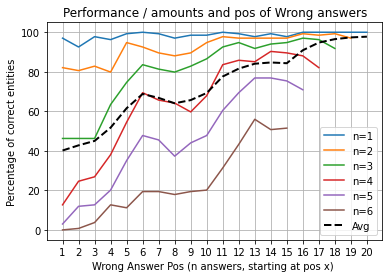

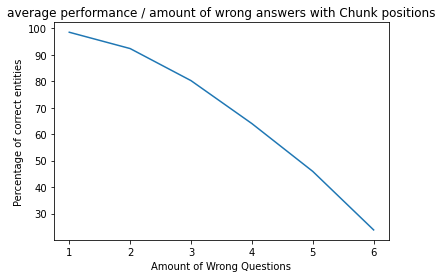

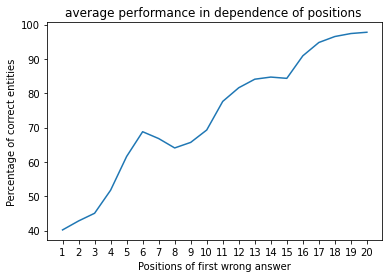

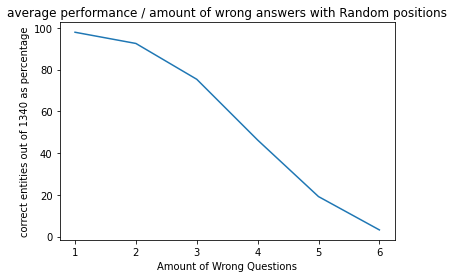

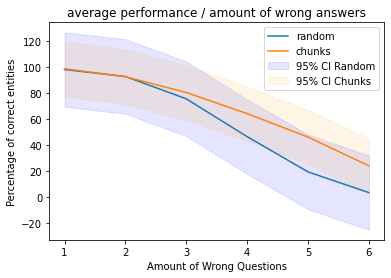

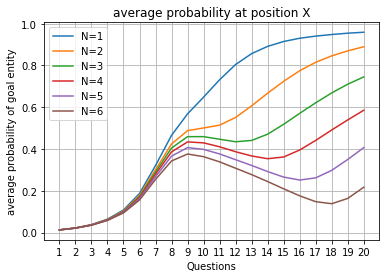

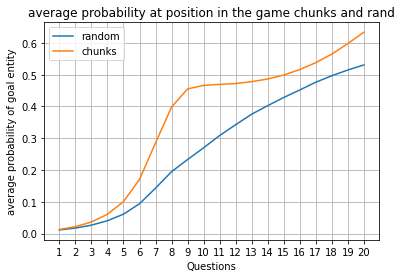

In [7]:

x = range(0,20)
x1 = range(0,19)
x2= range(0,18)
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(x, resultOneWrongCo,label="n=1")
ax.plot(x1, resultTwoWrongCo,label="n=2")
ax.plot(x2, resultThreeWrongCo,label="n=3")
ax.plot(range(0,17), resultFourWrongCo,label="n=4")
ax.plot(range(0,16), resultFiveWrongCo, label="n=5")
ax.plot(range(0,15), resultSixWrongCo, label="n=6")
ax.plot(avgPerLocation, color='black', linestyle='--', linewidth=2, label='Avg')
#ax.plot(range(0,15), avgPerLocation, label="average")
ax.legend()
ax.set(xlabel='Wrong Answer Pos (n answers, starting at pos x) ', ylabel='Percentage of correct entities',
       title='Performance / amounts and pos of Wrong answers',label = ["n", "j", "k", "l", "o"])
ax.grid()
labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x, labels)#, rotation=45)
#plt.savefig('PlotNPos.png')
plt.show()

fig1, ax1 = plt.subplots()
ax1.plot(range(0,len(avgOverAll)), avgOverAll)
ax1.set(xlabel='Amount of Wrong Questions', ylabel ='Percentage of correct entities', title='average performance / amount of wrong answers with Chunk positions')
label = [1,2,3,4,5,6]
plt.xticks(range(0,6), label)
#plt.savefig('PlotAvgN.png')
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(range(0,20), avgPerLocation)
ax2.set(xlabel='Positions of first wrong answer', ylabel ='Percentage of correct entities', title='average performance in dependence of positions ')
plt.xticks(x, labels)
#plt.savefig('PlotAvgPos.png')
plt.show()
#print(PerformanceNWrongsRandom)

fig3, ax3 = plt.subplots()
ax3.plot(range(0,len(PerformanceNWrongsRandom)),PerformanceNWrongsRandom)
ax3.set(xlabel='Amount of Wrong Questions', ylabel ='correct entities out of 1340 as percentage', title='average performance / amount of wrong answers with Random positions')
plt.xticks(range(0,6), [1,2,3,4,5,6])
plt.show()

fig4, ax4 = plt.subplots()
ci = 1.96 * np.std(PerformanceNWrongsRandom)/np.sqrt(6)
ci2 = 1.96 * np.std(avgOverAll)/np.sqrt((6))
ax4.plot(range(0,len(PerformanceNWrongsRandom)),PerformanceNWrongsRandom, label = "random")
ax4.plot(range(0,len(avgOverAll)), avgOverAll, label = "chunks")
ax4.fill_between(range(6), (PerformanceNWrongsRandom-ci), (PerformanceNWrongsRandom+ci), color='b', alpha=.1, label = "95% CI Random")
ax4.fill_between(range(6), (avgOverAll-ci2), (avgOverAll+ci2), color='orange', alpha=.1,label = "95% CI Chunks")
ax4.set(xlabel='Amount of Wrong Questions', ylabel ='Percentage of correct entities', title='average performance / amount of wrong answers')
ax4.legend()
plt.xticks(range(0,6), [1,2,3,4,5,6])
#plt.savefig("CiRandomChunk.png")
#plt.show()

fig5, ax5= plt.subplots()
ax5.plot(range(0,20), avgProbN1,label="N=1")
ax5.plot(range(0,20), avgProbN2,label="N=2")
ax5.plot(range(0,20), avgProbN3,label="N=3")
ax5.plot(range(0,20), avgProbN4,label="N=4")
ax5.plot(range(0,20), avgProbN5, label="N=5")
ax5.plot(range(0,20), avgProbN6, label="N=6")
#ax.plot(range(0,20), resultSixWrongCo, label="n=6")
ax5.set(xlabel='Questions', ylabel ='average probability of goal entity', title='average probability at position X')
plt.xticks(range(20), [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax5.grid()
ax5.legend()
plt.savefig("AvgProbChunk.png")
plt.show()



fig6, ax6= plt.subplots()
ax6.plot(range(0,20), avgProbRandOneToSix,label="random")
ax6.plot(range(0,20), avgProbChunks,label="chunks")
ax6.set(xlabel='Questions', ylabel ='average probability of goal entity', title='average probability at position in the game chunks and rand')
plt.xticks(range(20), [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax6.grid()
ax6.legend()
plt.savefig("AvgProbRandChunk.png")
plt.show()


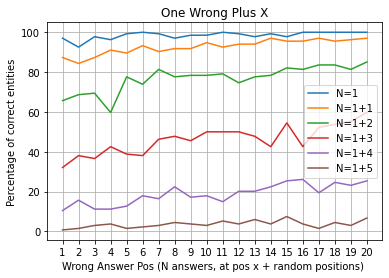

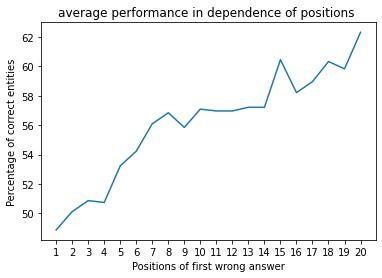

In [6]:
fig, ax = plt.subplots()
x = (range(0,20))
ax.plot(x, OnePlusZero,label="N=1")
ax.plot(x, OnePlusOne,label="N=1+1")
ax.plot(x, OnePlusTwo,label="N=1+2")
ax.plot(x, OnePlusThree,label="N=1+3")
ax.plot(x, OnePlusFour,label="N=1+4")
ax.plot(x, OnePlusFive, label="N=1+5")
#ax.plot(x, resultSixWrongCo, label="n=6")
#ax.plot(range(0,15), avgPerLocation, label="average")
ax.legend()
ax.set(xlabel='Wrong Answer Pos (N answers, at pos x + random positions) ', ylabel='Percentage of correct entities',
       title='One Wrong Plus X',label = ["n", "j", "k", "l", "o"])
ax.grid()
labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x, labels)#, rotation=45)
plt.savefig('XPlusN.png')
plt.show()

avgPerLoc = []
for i in range(20):
    avgPerLoc.append((OnePlusZero[i]+OnePlusOne[i]+OnePlusTwo[i]+OnePlusThree[i]+OnePlusFour[i]+ OnePlusFive[i])/6 )
    
fig2, ax2 = plt.subplots()
ax2.plot(range(0,20), avgPerLoc)
ax2.set(xlabel='Positions of first wrong answer', ylabel ='Percentage of correct entities', title='average performance in dependence of positions ')
plt.xticks(x, labels)
plt.savefig('PlotAvgPos.png')
plt.show()


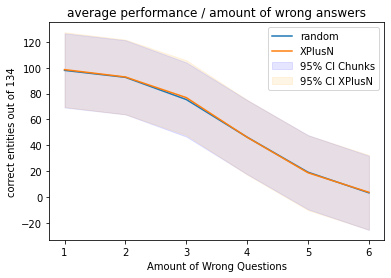

In [18]:
fig4, ax4 = plt.subplots()
ci = 1.96 * np.std(PerformanceNWrongsRandom)/np.sqrt(6)
ci2 = 1.96 * np.std(avgOverAll)/np.sqrt((6))
ci3 = 1.96 * np.std(avgPerNPlus)/np.sqrt((6))
ax4.plot(range(0,len(PerformanceNWrongsRandom)),PerformanceNWrongsRandom, label = "random")
#ax4.plot(range(0,len(avgOverAll)), avgOverAll, label = "chunks")
ax4.plot(range(0,len(avgPerNPlus)),avgPerNPlus, label = "XPlusN")
ax4.fill_between(range(6), (PerformanceNWrongsRandom-ci), (PerformanceNWrongsRandom+ci), color='b', alpha=.1, label = "95% CI Chunks")
#ax4.fill_between(range(6), (avgOverAll-ci2), (avgOverAll+ci2), color='orange', alpha=.1,label = "95% CI Random")
ax4.fill_between(range(6), (avgPerNPlus-ci3), (avgPerNPlus+ci3), color='orange', alpha=.1,label = "95% CI XPlusN")
ax4.set(xlabel='Amount of Wrong Questions', ylabel ='correct entities out of 134', title='average performance / amount of wrong answers')
ax4.legend()
plt.xticks(range(0,6), [1,2,3,4,5,6])
plt.savefig("CiRandomChunkN.png")
#plt.show()

In [16]:
#First 4 Questions answered wrong each time (5/100) /Instead with random branching: (16/100)


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
False
0.01
Question: 2
Does the thing you are looking for have the attribute: nationality United_States?
True
0.0001
Question: 3
Does the thing you are looking for have the attribute: memberOf Democratic_Party_(United_States)?
True
1.0000000000000002e-06
Question: 4
Does the thing you are looking for have the attribute: hasOccupation Politician?
True
1.0000000000000002e-08
Question: 5
Does the thing you are looking for have the attribute: award Presidential_Medal_of_Freedom?
False
9.900000000000001e-09
Question: 6
Does the thing you are looking for have the attribute: alumniOf Columbia_University?
False
9.801000000000001e-09
Question: 7
Does the thing you are looking for have the attribute: homeLocation San_Francisco?
False
9.702990000000001e-09
Question: 8
Does the thing you are looking for have the attribute: hasOccupation Statesman?
False
9.60596

In [34]:
#4 wrong per question, first 100 entities
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
wrongAnswersPerQuestion = 4
totalgames = 100
Entrop_over_game = []
list_losses=[]
list_wins=[]

possibleObj, possiblePred, count = findSplits()
loadAllAttributes(possibleObj,possiblePred)
qres = loadSubjects()

while gamesplayed < totalgames:
    answerPattern, initilaizeCount = wrongAnswerList(wrongAnswersPerQuestion)
    Entropies=[]
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']
    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit, Entropy=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestionManipulate(possibleObj, possiblePred, indexSplit,subject, Distribution, i)
        i+=1
        Entropies.append(Entropy)
    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():
        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
        list_wins.append(answerPattern)
    else:
        list_losses.append(answerPattern)
    gamesplayed+=1
    Entrop_over_game.append(Entropies)
    time.sleep(1)
    
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: nationality United_States?
False
0.9702989999999999
Question: 4
Does the thing you are looking for have the attribute: nationality United_Kingdom?
True
0.96059601
Question: 5
Does the thing you are looking for have the attribute: award Order_of_the_British_Empire?
True
0.9509900498999999
Question: 6
Does the thing you are looking for have the attribute: hasOccupation Stage_actor?
wrong answer incoming
True
0.009509900499
Question: 7
Does the thing you are looking for have the attribute: award Academy_Award_for_Best_Supporting_Actress?
False
0.00941480149401
Question: 8
Does the thing you are looking for have the attribute: award Theatre_World_Award?
False
0.009320653

In [33]:
#without printing results # 3 wrong per question
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
wrongAnswersPerQuestion = 3
totalgames = 100
Entrop_over_game = []
list_losses=[]
list_wins=[]

possibleObj, possiblePred, count = findSplits()
loadAllAttributes(possibleObj,possiblePred)
qres = loadSubjects()

while gamesplayed < totalgames:
    answerPattern, initilaizeCount = wrongAnswerList(wrongAnswersPerQuestion)
    Entropies=[]
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']
    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit, Entropy=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestionManipulate(possibleObj, possiblePred, indexSplit,subject, Distribution, i)
        i+=1
        Entropies.append(Entropy)
    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():
        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
        list_wins.append(answerPattern)
    else:
        list_losses.append(answerPattern)
    gamesplayed+=1
    Entrop_over_game.append(Entropies)
    time.sleep(20)
    
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: nationality United_States?
False
0.9702989999999999
Question: 4
Does the thing you are looking for have the attribute: nationality United_Kingdom?
True
0.96059601
Question: 5
Does the thing you are looking for have the attribute: award Order_of_the_British_Empire?
True
0.9509900498999999
Question: 6
Does the thing you are looking for have the attribute: hasOccupation Stage_actor?
wrong answer incoming
True
0.009509900499
Question: 7
Does the thing you are looking for have the attribute: award Academy_Award_for_Best_Supporting_Actress?
False
0.00941480149401
Question: 8
Does the thing you are looking for have the attribute: award Theatre_World_Award?
False
0.009320653

In [64]:
#4 Questions Wrong for each entitiy
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
wrongAnswersPerQuestion = 4
totalgames = 100
Entrop_over_game = []

possibleObj, possiblePred, count = findSplits()
qres = loadSubjects()

while gamesplayed < totalgames:
    answerPattern, initilaizeCount = wrongAnswerList(wrongAnswersPerQuestion)
    Entropies=[]
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']
    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit, Entropy=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestionManipulate(possibleObj, possiblePred, indexSplit,subject, Distribution, i)
        i+=1
        Entropies.append(Entropy)
    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():
        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
    gamesplayed+=1
    Entrop_over_game.append(Entropies)
    time.sleep(20)
    
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Songwriter?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: nationality United_States?
wrong answer incoming
True
0.009801
Question: 4
Does the thing you are looking for have the attribute: hasOccupation Actor?
wrong answer incoming
False
9.801e-05
Question: 5
Does the thing you are looking for have the attribute: award Presidential_Medal_of_Freedom?
False
9.70299e-05
Question: 6
Does the thing you are looking for have the attribute: hasOccupation Dancer?
wrong answer incoming
True
9.70299e-07
Question: 7
Does the thing you are looking for have the attribute: award Nickelodeon_Kids'_Choice_Awards?
False
9.6059601e-07
Question: 8
Does the thing you are looking for have the attribute: award MTV_Video_Music_Award_for_Video_

In [14]:
#10 runs, only david bowie, 20% wrong
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
totalgames = 10

possibleObj, possiblePred, count = findSplits()
qres = loadSubjects()
while gamesplayed < totalgames:
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']

    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    
    subject = allSubjects(qres, 0)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestion(possibleObj, possiblePred, indexSplit,subject, Distribution)
        i+=1

    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():

        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
    gamesplayed+=1
    time.sleep(5)
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.99
Question: 2
Does the thing you are looking for have the attribute: award Presidential_Medal_of_Freedom?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: hasOccupation Politician?
False
0.9702989999999999
Question: 4
Does the thing you are looking for have the attribute: hasOccupation Poet?
False
0.96059601
Question: 5
Does the thing you are looking for have the attribute: hasOccupation Film_director?
False
0.9509900498999999
Question: 6
Does the thing you are looking for have the attribute: knowsLanguage English_language?
True
0.9414801494009999
Question: 7
Does the thing you are looking for have the attribute: knowsLanguage German_language?
False
haha fooled!
0.009414801494009998
Question: 8
Does the thing you are looking for have the attribute: award MTV_Video_Music_Award_for_Best_Pop_Video?
False


In [12]:
#RESULTS 5% Error Rate, All entities once
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
totalgames = 130

possibleObj, possiblePred, count = findSplits()
qres = loadSubjects()
while gamesplayed < totalgames:
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']

    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestion(possibleObj, possiblePred, indexSplit,subject, Distribution)
        i+=1

    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():

        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
    gamesplayed+=1
    time.sleep(60)
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Businessperson?
False
haha fooled!
0.0099
Question: 3
Does the thing you are looking for have the attribute: homeLocation New_York_City?
False
0.009801
Question: 4
Does the thing you are looking for have the attribute: memberOf Democratic_Party_(United_States)?
False
0.00970299
Question: 5
Does the thing you are looking for have the attribute: award Grammy_Award_for_Best_Rap%2FSung_Performance?
False
0.0096059601
Question: 6
Does the thing you are looking for have the attribute: award MTV_Video_Music_Award_for_Best_Female_Video?
False
0.009509900499
Question: 7
Does the thing you are looking for have the attribute: hasOccupation Screenwriter?
False
0.00941480149401
Question: 8
Does the thing you are looking for have the attribute: knowsLanguage French_language

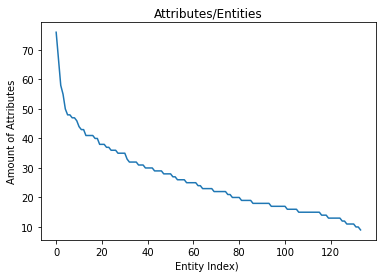

12.114606892340202
146.76370015593673
25.813432835820894
23.0


In [27]:
CountOfAttrPerEnt = [76, 67, 58, 55, 50, 48, 48, 47, 47, 46, 44, 43, 43, 41, 41, 41, 41, 40, 40, 38, 38, 38, 37, 37, 36, 36, 36, 35, 35, 35, 35, 33, 32, 32, 32, 32, 31, 31, 31, 30, 30, 30, 30, 29, 29, 29, 29, 28, 28, 28, 28, 27, 27, 26, 26, 26, 26, 25, 25, 25, 25, 25, 24, 24, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 21, 21, 20, 20, 20, 20, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 11, 11, 11, 11, 10, 10, 9]

fig, ax = plt.subplots()
ax.plot(range(0,len(CountOfAttrPerEnt)), CountOfAttrPerEnt)
ax.set(xlabel='Entity Index) ', ylabel='Amount of Attributes',
       title='Attributes/Entities')
plt.savefig("attributesEntitiy.png")
plt.show()
print(np.std(CountOfAttrPerEnt))
print(np.var(CountOfAttrPerEnt))
print(np.mean(CountOfAttrPerEnt))
print(np.median(CountOfAttrPerEnt))

In [12]:
np.multiply(134, scale)

100.0

In [8]:
baguette = resultsSixWrongRandomly ,resultsFiveWrongRandomly ,resultsFourWrongRandomly ,resultsThreeWrongRandomly,resultsTwoWrongRandomly ,resultsOneWrongRandomly,resultsZeroWrong


In [11]:
for i in reversed(baguette):
    print(np.std(i))
    print("&")

0.0
&
1.6281659872590613
&
2.110766511004618
&
4.101084078816146
&
3.655954839974894
&
3.371449850172094
&
1.6366949402583066
&


In [3]:
sum(avgPerLocation) / len(avgPerLocation)

73.27611940298507

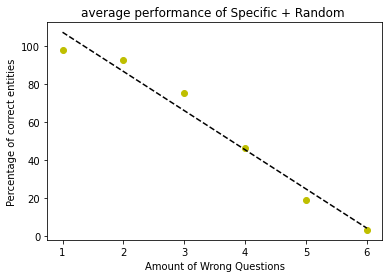

In [14]:
x=[1,2,3,4,5,6]
y =PerformanceNWrongsRandom
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
fig, ax = plt.subplots()
ax.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
ax.set(xlabel='Amount of Wrong Questions', ylabel ='Percentage of correct entities', title='average performance of Specific + Random ')
plt.savefig('estimate.png')

In [10]:
lol=[ OnePlusZero, OnePlusOne,OnePlusTwo,OnePlusThree, OnePlusFour,OnePlusFive ]
for a in lol:
    print(sum(a)/len(a), "&")
    
for b in lol:
    print(np.std(b), "&")

98.50746268656715 &
92.79850746268657 &
76.86567164179104 &
46.194029850746276 &
18.731343283582095 &
3.6194029850746268 &
1.7972529222078026 &
3.5262674690542575 &
6.384850637673863 &
7.047795330759937 &
4.898729382769048 &
1.7224908787438493 &


In [23]:
fu = [resultOneWrongCo,resultTwoWrongCo,resultThreeWrongCo,resultFourWrongCo,resultFiveWrongCo,resultSixWrongCo]
for i in fu:
    print(np.std(i).round(1))

1.8
6.5
17.3
24.2
23.9
18.0


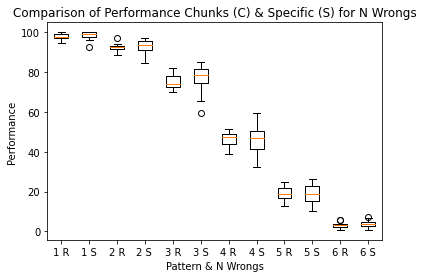

0.40005923562843926
0.8364311926739395
0.5208425815998308
0.9759871502273783
0.8035794184966198
0.5505385411070953


In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# Plotting the results
labels = ["1 R","1 S","2 R","2 S ","3 R","3 S","4 R","4 S","5 R","5 S","6 R","6 S",]
data = [resWrongRandom[0], OnePlusZero, resWrongRandom[1], OnePlusOne, resWrongRandom[2], OnePlusTwo, resWrongRandom[3], OnePlusThree, resWrongRandom[4], OnePlusFour, resWrongRandom[5], OnePlusFive]

plt.boxplot(data, labels=labels)
plt.xlabel('Pattern & N Wrongs')
plt.ylabel('Performance')
plt.title('Comparison of Performance Chunks (C) & Specific (S) for N Wrongs')
plt.savefig("BoxplotRandSpec.png")
plt.show()

# Performing statistical test
for i in range(0,12,2):
    
    t_stat, p_value = ttest_ind(data[i], data[i+1])
    print(p_value)
    #if p_value < 0.05:
    #    print('There is a statistically significant difference between the two groups.')
    #else:
    #    print('There is no statistically significant difference between the two groups.')

In [40]:

resWrongRandom
resWrongChunk
resNplus

for i in range(6):
    _, p_value= ttest_ind(resWrongRandom[i], resWrongChunk[i], equal_var=True)#prin
    print(p_value)
print("_")    
for i in range(6):
    _,p_value= ttest_ind(resWrongRandom[i], resNplus[i], equal_var=True)#prin
    print(p_value)
print("_")        
for i in range(6):
    _,p_value= ttest_ind(resNplus[i], resWrongChunk[i], equal_var=True)#prin
    print(p_value)

0.40005923562843926
0.9293529271225516
0.4085273188080232
0.0360036058102128
0.0024672643818804707
0.0020856760699441744
_
0.40005923562843926
0.8364311926739395
0.5208425815998308
0.9759871502273783
0.8035794184966198
0.5505385411070953
_
1.0
0.7906812786604273
0.4367979266054208
0.0043009683217331285
2.9054316609608346e-05
2.870540936437804e-05


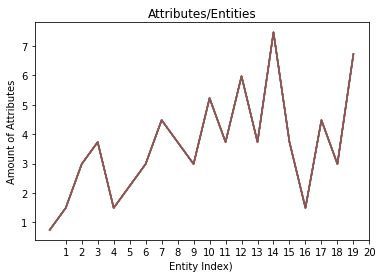

In [59]:
fig, ax = plt.subplots()
for i in range(6):
    ax.plot(range(0,20), resNplus[5])
ax.set(xlabel='Entity Index) ', ylabel='Amount of Attributes',
       title='Attributes/Entities')
plt.xticks(range(1,21))
#plt.savefig("attributesEntitiy.png")
plt.show()

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = [] 
for i in range(0,2):
    X.append([i, resNplus[0][i]])
y = [0, resNplus[0][0]]
reg = LinearRegression().fit(X, y)
reg.score(X, y)


1.0

In [68]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b
for i in range(6):
    best_fit(range(0,20), resWrongChunk[i])


best fit line:
y = 96.64 + 0.20x
best fit line:
y = 109.01 + -1.76x
best fit line:
y = 102.13 + -2.31x
best fit line:
y = 86.98 + -2.42x
best fit line:
y = 67.76 + -2.30x
best fit line:
y = 36.97 + -1.38x


In [22]:
randomNoise= [resultsSixWrongRandomly,resultsFiveWrongRandomly,resultsFourWrongRandomly,resultsThreeWrongRandomly,resultsTwoWrongRandomly,resultsOneWrongRandomly]
randomNoise.reverse()
print(randomNoise)

[array([ 97.76119403,  94.7761194 ,  97.01492537,  99.25373134,
        97.01492537, 100.        ,  99.25373134, 100.        ,
        97.76119403,  96.26865672]), array([94.02985075, 92.53731343, 93.28358209, 90.29850746, 93.28358209,
       97.01492537, 92.53731343, 92.53731343, 91.04477612, 88.80597015]), array([75.37313433, 73.13432836, 72.3880597 , 75.37313433, 82.08955224,
       82.08955224, 70.14925373, 71.64179104, 72.3880597 , 79.10447761]), array([51.49253731, 47.01492537, 43.28358209, 49.25373134, 44.7761194 ,
       47.76119403, 49.25373134, 48.50746269, 42.53731343, 38.80597015]), array([22.3880597 , 21.64179104, 17.91044776, 21.64179104, 24.62686567,
       20.14925373, 16.41791045, 12.68656716, 17.91044776, 16.41791045]), array([2.23880597, 2.98507463, 3.73134328, 5.97014925, 3.73134328,
       2.23880597, 2.98507463, 5.97014925, 0.74626866, 1.49253731])]


In [23]:
for i in randomNoise:
    print(i)
       
nplusxs

[ 97.76119403  94.7761194   97.01492537  99.25373134  97.01492537
 100.          99.25373134 100.          97.76119403  96.26865672]
[94.02985075 92.53731343 93.28358209 90.29850746 93.28358209 97.01492537
 92.53731343 92.53731343 91.04477612 88.80597015]
[75.37313433 73.13432836 72.3880597  75.37313433 82.08955224 82.08955224
 70.14925373 71.64179104 72.3880597  79.10447761]
[51.49253731 47.01492537 43.28358209 49.25373134 44.7761194  47.76119403
 49.25373134 48.50746269 42.53731343 38.80597015]
[22.3880597  21.64179104 17.91044776 21.64179104 24.62686567 20.14925373
 16.41791045 12.68656716 17.91044776 16.41791045]
[2.23880597 2.98507463 3.73134328 5.97014925 3.73134328 2.23880597
 2.98507463 5.97014925 0.74626866 1.49253731]


[array([ 97.01492537,  92.53731343,  97.76119403,  96.26865672,
         99.25373134, 100.        ,  99.25373134,  97.01492537,
         98.50746269,  98.50746269, 100.        ,  99.25373134,
         97.76119403,  99.25373134,  97.76119403, 100.        ,
        100.        , 100.        , 100.        , 100.        ]),
 array([87.31343284, 84.32835821, 87.31343284, 91.04477612, 89.55223881,
        93.28358209, 90.29850746, 91.79104478, 91.79104478, 94.7761194 ,
        92.53731343, 94.02985075, 94.02985075, 97.01492537, 95.52238806,
        95.52238806, 97.01492537, 95.52238806, 96.26865672, 97.01492537]),
 array([65.67164179, 68.65671642, 69.40298507, 59.70149254, 77.6119403 ,
        73.88059701, 81.34328358, 77.6119403 , 78.35820896, 78.35820896,
        79.10447761, 74.62686567, 77.6119403 , 78.35820896, 82.08955224,
        81.34328358, 83.58208955, 83.58208955, 81.34328358, 85.07462687]),
 array([32.08955224, 38.05970149, 36.56716418, 42.53731343, 38.80597015,
        38.059701